In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

sheet_id = "1GQ2wltXJ-veItC2BVoWJx7MmeS2mcljb62dVRrAMYZk"
sheet_name = "sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url,index_col=0)

df = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'status']]

df.drop(['status'],axis=1,inplace=True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [2]:
# Function to classify Parkinson's severity based on voice features
def pd_flag(row):
    pd_criteria = 0
    
    # Frequency (Jitter) abnormalities
    if row['MDVP:Jitter(%)'] > 0.5:
        pd_criteria += 1
    if row['MDVP:Jitter(Abs)'] > 0.005:
        pd_criteria += 1
    if row['MDVP:RAP'] > 0.005:
        pd_criteria += 1
    if row['MDVP:PPQ'] > 0.005:
        pd_criteria += 1
    if row['Jitter:DDP'] > 0.01:
        pd_criteria += 1

    # Amplitude (Shimmer) abnormalities
    if row['MDVP:Shimmer'] > 0.02:
        pd_criteria += 1
    if row['MDVP:Shimmer(dB)'] > 1:
        pd_criteria += 1
    if row['Shimmer:APQ3'] > 0.01:
        pd_criteria += 1
    if row['Shimmer:APQ5'] > 0.01:
        pd_criteria += 1
    if row['MDVP:APQ'] > 0.02:
        pd_criteria += 1
    if row['Shimmer:DDA'] > 0.02:
        pd_criteria += 1

    # Noise / signal irregularity
    if row['NHR'] > 0.2:
        pd_criteria += 1
    if row['HNR'] < 15:
        pd_criteria += 1
    if row['RPDE'] > 0.5:
        pd_criteria += 1
    if row['DFA'] > 1.0:
        pd_criteria += 1
    if row['spread1'] < -1:
        pd_criteria += 1
    if row['spread2'] > 1:
        pd_criteria += 1
    if row['D2'] > 4:
        pd_criteria += 1
    if row['PPE'] > 0.1:
        pd_criteria += 1

    # Severity classification
    if pd_criteria == 0:
        return 'normal'
    elif pd_criteria < 5:
        return 'mild'
    elif pd_criteria < 10:
        return 'moderate_pd'
    else:
        return 'severe_pd'


In [3]:
df['class'] = df.apply(pd_flag,axis=1)

In [4]:
df['class'].value_counts()

class
moderate_pd    98
mild           70
severe_pd      27
Name: count, dtype: int64

In [5]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'class'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np

# Columns based on your Parkinson's dataset
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
            'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
            'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
            'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
            'spread2', 'D2', 'PPE', 'class']

# Normal ranges based on the previous table
ranges = {
    'MDVP:Fo(Hz)': (100, 200),
    'MDVP:Fhi(Hz)': (150, 300),
    'MDVP:Flo(Hz)': (80, 150),
    'MDVP:Jitter(%)': (0, 0.5),
    'MDVP:Jitter(Abs)': (0, 0.005),
    'MDVP:RAP': (0, 0.005),
    'MDVP:PPQ': (0, 0.005),
    'Jitter:DDP': (0, 0.01),
    'MDVP:Shimmer': (0, 0.02),
    'MDVP:Shimmer(dB)': (0, 1),
    'Shimmer:APQ3': (0, 0.01),
    'Shimmer:APQ5': (0, 0.01),
    'MDVP:APQ': (0, 0.02),
    'Shimmer:DDA': (0, 0.02),
    'NHR': (0, 0.2),
    'HNR': (15, 25),
    'RPDE': (0, 0.5),
    'DFA': (0.5, 1.0),
    'spread1': (-1, 0),
    'spread2': (0, 1),
    'D2': (2, 4),
    'PPE': (0, 0.1),
    'class' : (0,0)
    
}
    

# Generate 50 samples of normal patients
data = []
for _ in range(50):
    sample = []
    for col in columns:
        low, high = ranges[col]
        if col == 'class':
            sample.append('normal')
        else:
            sample.append(np.round(np.random.uniform(low, high), 7))
    data.append(sample)

# Create DataFrame
normal_df = pd.DataFrame(data, columns=columns)
normal_df 


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,class
0,173.596663,179.614688,119.915196,0.219573,0.000340,0.000943,0.000777,0.005680,0.009080,0.758443,0.000149,0.003253,0.011322,0.012204,0.072213,21.561818,0.134820,0.782940,-0.261364,0.690053,3.827529,0.081939,normal
1,170.200831,274.615918,82.269717,0.476624,0.000954,0.004746,0.002811,0.005896,0.010958,0.069026,0.006787,0.005624,0.015145,0.006363,0.003279,16.227416,0.353357,0.503235,-0.952424,0.193824,3.915403,0.038971,normal
2,172.232965,203.595387,98.709731,0.352752,0.003108,0.001943,0.004879,0.002042,0.015123,0.442826,0.000839,0.002825,0.018956,0.016297,0.180016,24.405863,0.158183,0.962125,-0.224744,0.485651,3.039134,0.080986,normal
3,180.773390,275.583496,126.688674,0.202893,0.000742,0.000330,0.002179,0.008352,0.000999,0.705632,0.001951,0.006599,0.001424,0.015687,0.016103,18.184300,0.139477,0.704349,-0.404218,0.516767,2.845288,0.042637,normal
4,112.355003,282.275020,139.263622,0.146330,0.001071,0.004083,0.001744,0.005579,0.008072,0.897067,0.001683,0.002483,0.007458,0.009763,0.052714,18.050588,0.005138,0.922595,-0.791427,0.252190,3.729389,0.070085,normal
5,114.353669,190.481128,111.915134,0.392836,0.000314,0.000446,0.002520,0.002540,0.015215,0.014919,0.002090,0.005262,0.012592,0.016540,0.078535,21.346879,0.114897,0.903031,-0.177019,0.333572,3.773671,0.064220,normal
6,101.373474,297.612834,125.461155,0.366012,0.000389,0.002038,0.002944,0.003668,0.000856,0.753355,0.002931,0.004545,0.006418,0.012721,0.079344,17.518566,0.128262,0.695466,-0.670165,0.905467,2.310746,0.067315,normal
7,112.474675,215.539180,98.138195,0.254547,0.000457,0.002972,0.004571,0.003774,0.018341,0.772087,0.009128,0.002909,0.011628,0.001176,0.173155,17.948193,0.466560,0.897285,-0.489222,0.421520,3.193770,0.033323,normal
8,104.623295,255.337258,107.768985,0.263764,0.003863,0.001090,0.000183,0.003571,0.017653,0.384192,0.008759,0.009041,0.001198,0.016332,0.193858,16.325446,0.299874,0.735055,-0.592561,0.781093,2.523226,0.020162,normal
9,168.100909,202.795477,116.862054,0.188132,0.004747,0.000976,0.001831,0.006491,0.007046,0.469527,0.009229,0.003922,0.008240,0.010575,0.011666,22.586984,0.038460,0.602521,-0.438491,0.201430,2.475560,0.010056,normal


In [7]:
df = pd.concat([df,normal_df],axis=0)
df.reset_index(drop=True,inplace=True)

In [8]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,class
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,moderate_pd
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,moderate_pd
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,severe_pd
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,severe_pd
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,severe_pd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,153.477517,266.182741,126.527347,0.364738,0.003484,0.000127,0.001270,0.005794,0.002149,0.974411,0.001187,0.008555,0.008806,0.007418,0.136164,17.113034,0.021737,0.774502,-0.192747,0.073231,2.069356,0.009887,normal
241,190.065733,157.097557,115.061888,0.051894,0.003171,0.002381,0.003550,0.004906,0.016842,0.302351,0.001695,0.008889,0.008618,0.015216,0.032126,20.415858,0.473170,0.701190,-0.584874,0.502881,3.998398,0.005398,normal
242,111.180413,198.624370,143.087569,0.296861,0.004010,0.003300,0.002207,0.003058,0.019205,0.040428,0.000829,0.008829,0.004518,0.009997,0.049878,19.576961,0.315769,0.696636,-0.645240,0.210635,2.005980,0.075767,normal
243,166.811504,218.072987,132.682152,0.142544,0.000175,0.003595,0.000002,0.000734,0.017330,0.234542,0.002322,0.009451,0.015156,0.016161,0.098297,17.760495,0.324740,0.882558,-0.956227,0.900989,3.484512,0.068598,normal


In [9]:
x = df.drop(['class'],axis=1)
y = df['class']

In [10]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,153.477517,266.182741,126.527347,0.364738,0.003484,0.000127,0.001270,0.005794,0.002149,0.974411,0.001187,0.008555,0.008806,0.007418,0.136164,17.113034,0.021737,0.774502,-0.192747,0.073231,2.069356,0.009887
241,190.065733,157.097557,115.061888,0.051894,0.003171,0.002381,0.003550,0.004906,0.016842,0.302351,0.001695,0.008889,0.008618,0.015216,0.032126,20.415858,0.473170,0.701190,-0.584874,0.502881,3.998398,0.005398
242,111.180413,198.624370,143.087569,0.296861,0.004010,0.003300,0.002207,0.003058,0.019205,0.040428,0.000829,0.008829,0.004518,0.009997,0.049878,19.576961,0.315769,0.696636,-0.645240,0.210635,2.005980,0.075767
243,166.811504,218.072987,132.682152,0.142544,0.000175,0.003595,0.000002,0.000734,0.017330,0.234542,0.002322,0.009451,0.015156,0.016161,0.098297,17.760495,0.324740,0.882558,-0.956227,0.900989,3.484512,0.068598


In [11]:
for i in x.columns:
    px.histogram(df,x=i,color='class').show()

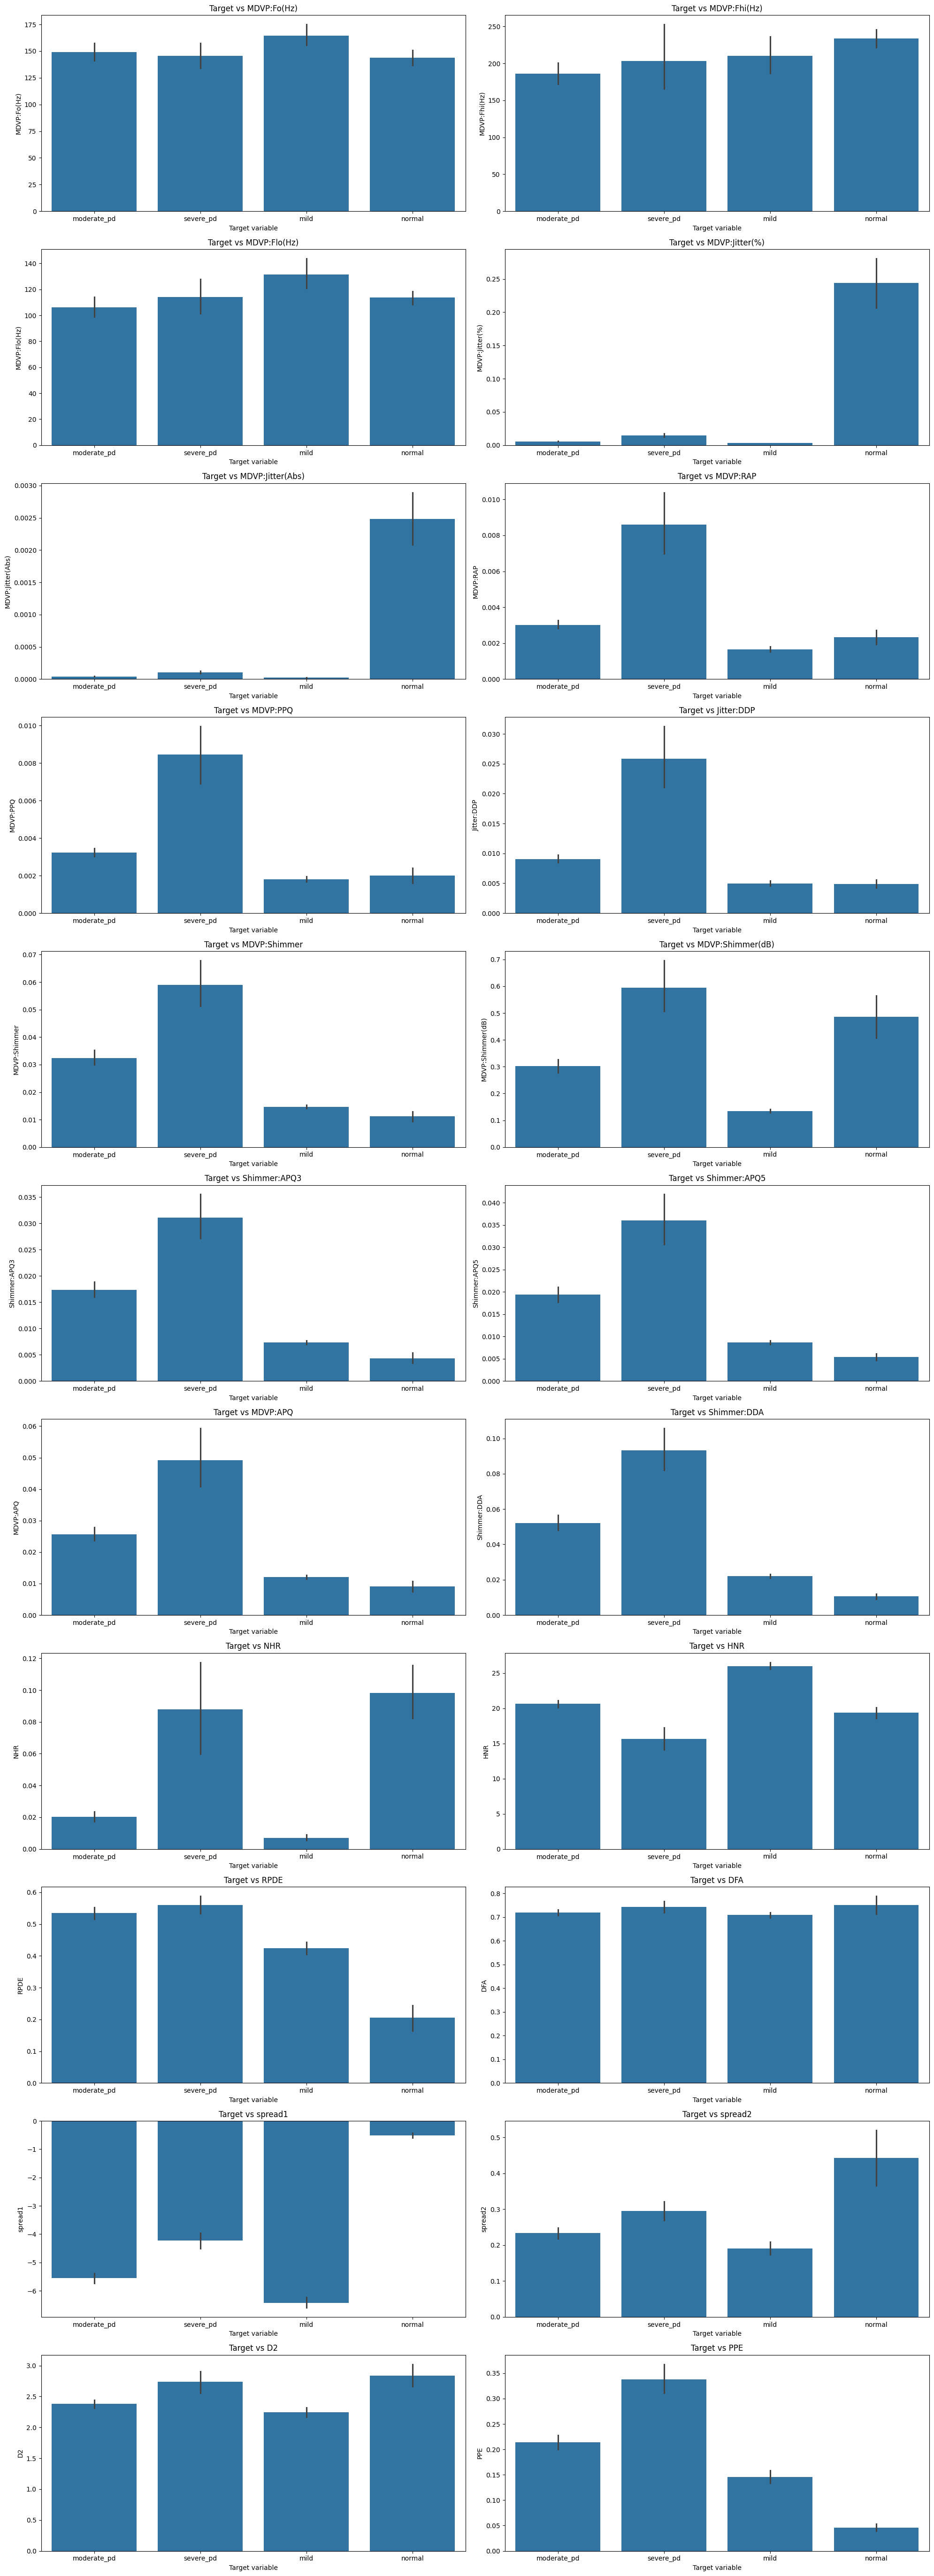

In [12]:
n_col =2 
n_row = (len(x.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(x.columns):
    sns.barplot(df,x = 'class', y = col,ax = ax[i])
    ax[i].set_title(f"Target vs {col}")
    ax[i].set_xlabel("Target variable")
    
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import f_oneway

RL = []
for i in x.columns:

    print(25*'-',i,25*'-')
    # Test scores from 4 different classes
    class_a = df[df['class'] == 'normal'][i].to_list()
    class_b = df[df['class'] == 'mild'][i].to_list()
    class_c = df[df['class'] == 'moderate_pd'][i].to_list()
    class_d = df[df['class'] == 'severe_pd'][i].to_list()
    


    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    # Interpret result
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: At least one group is significantly different.")
        RL.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    
    print(50*"*")
print(RL)

------------------------- MDVP:Fo(Hz) -------------------------
F-statistic: 3.7625
p-value: 0.0114
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Fhi(Hz) -------------------------
F-statistic: 3.7104
p-value: 0.0123
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Flo(Hz) -------------------------
F-statistic: 5.9693
p-value: 0.0006
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Jitter(%) -------------------------
F-statistic: 216.3755
p-value: 0.0000
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- MDVP:Jitter(Abs) -------------------------
F-statistic: 164.331

In [14]:
len(df.columns),len(RL)

(23, 22)

In [15]:
y.value_counts()

class
moderate_pd    98
mild           70
normal         50
severe_pd      27
Name: count, dtype: int64

In [16]:
y = y.replace({
        'normal' : 0,
        'mild' : 1,
        'moderate_pd' : 2,
        'severe_pd' :3
    })

In [17]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
x_sc = pd.DataFrame(RS.fit_transform(x),columns=RS.get_feature_names_out())
x_sc

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.468980,-0.409923,-0.652746,0.212575,0.428571,0.583333,1.380734,0.759322,1.403047,0.667870,1.145081,1.810243,0.918157,1.078665,0.131448,-0.083821,-0.219224,0.966246,0.248749,0.266579,-0.178390,0.842416
1,-0.428788,-0.500319,0.176554,0.396208,0.571429,1.023148,2.032110,1.242373,2.404818,1.389892,2.049164,3.075409,1.878955,1.930274,0.064416,-0.409737,-0.006857,1.010984,0.543791,0.779033,0.134026,1.438070
2,-0.524227,-0.683564,0.128191,0.478044,0.714286,1.388889,2.422018,1.647458,1.891980,0.870036,1.691140,2.473817,1.343879,1.592670,-0.082957,-0.147733,-0.145576,1.071892,0.396643,0.597974,-0.109614,1.182567
3,-0.524327,-0.612937,0.124154,0.425150,0.714286,1.194444,2.041284,1.430508,2.039399,0.996390,1.849734,2.607808,1.469051,1.741955,-0.072498,-0.148904,-0.120848,1.007963,0.526872,0.768332,-0.002964,1.440204
4,-0.535376,-0.572085,0.108965,0.711577,1.000000,1.902778,3.004587,2.211864,2.570451,1.238267,2.387246,3.355240,1.945667,2.248212,0.025909,-0.315376,-0.206684,1.052839,0.674711,0.029520,-0.126597,1.733423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.089922,0.727652,0.448024,35.831178,49.204286,-1.070833,-0.577798,-0.138373,-0.964278,2.647694,-0.814387,-0.262987,-0.519539,-0.650536,2.842503,-0.739663,-2.134729,0.535522,2.096276,-1.166430,-0.569447,-1.105524
241,0.700611,-0.412059,0.203104,4.609132,44.725714,-0.027269,0.467890,-0.288847,-0.127965,0.221484,-0.766144,-0.232488,-0.532442,-0.418188,0.369532,-0.187074,0.065323,-0.238759,1.939475,2.019539,2.680933,-1.137352
242,-0.616053,0.021809,0.801777,29.056956,56.707143,0.398102,-0.148119,-0.602051,0.006557,-0.724086,-0.848367,-0.237957,-0.814464,-0.573695,0.791493,-0.327428,-0.701766,-0.286858,1.915336,-0.147541,-0.676234,-0.638472
243,0.312478,0.225006,0.579500,13.656118,1.931429,0.534861,-1.159771,-0.995898,-0.100166,-0.023315,-0.706600,-0.181270,-0.082792,-0.390018,1.942396,-0.631338,-0.658045,1.676749,1.790981,4.971615,1.815050,-0.689301


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.25,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)

In [19]:
y_train.value_counts()

class
2    73
1    52
0    38
3    20
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x_train, y_train = ROS.fit_resample(x_train, y_train)

y_train.value_counts()

class
2    73
1    73
3    73
0    73
Name: count, dtype: int64

In [21]:
x_train.duplicated().sum()

np.int64(109)

In [22]:
# importing models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [23]:
# Assign the models to a dictionary
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    
}

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.97      1.00      0.99        73
           2       0.96      0.93      0.94        73
           3       0.96      0.96      0.96        73

    accuracy                           0.97       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.97      0.97      0.97       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.89      0.91        18
           2       0.85      0.92      0.88        25
           3       0.83 

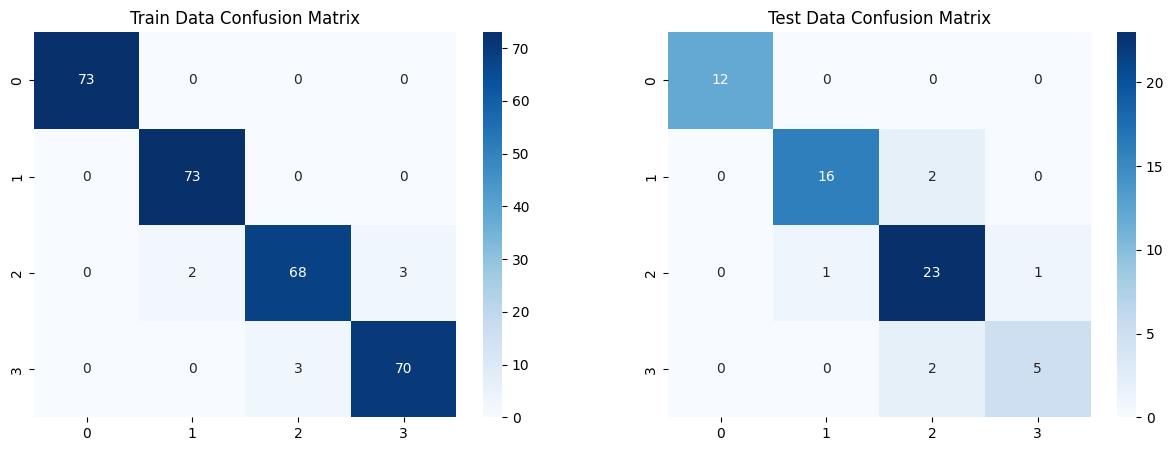

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.80      1.00      0.89        73
           2       0.79      0.73      0.76        73
           3       0.97      0.81      0.88        73

    accuracy                           0.88       292
   macro avg       0.89      0.88      0.88       292
weighted avg       0.89      0.88      0.88       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      0.94      0.89        18
           2     

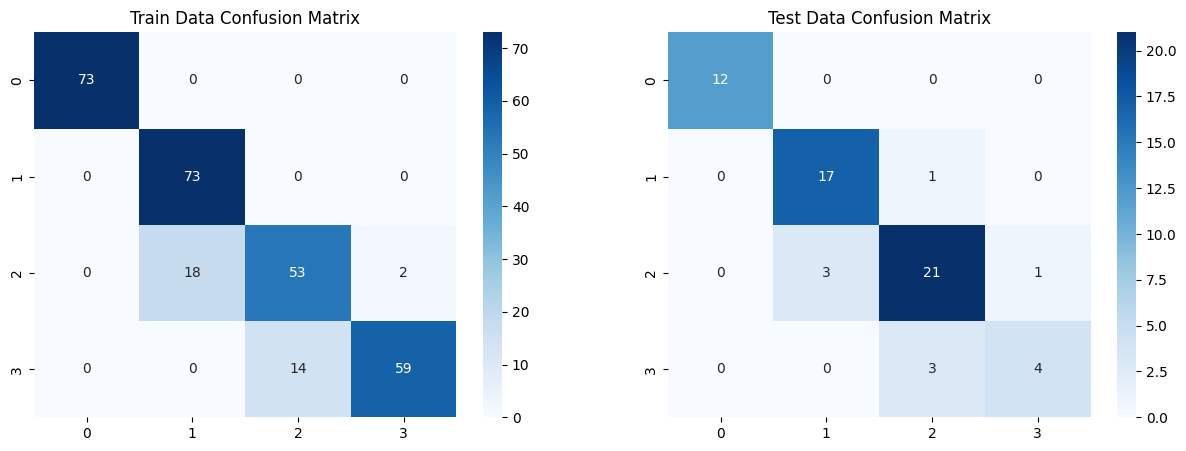

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.90      0.99      0.94        73
           2       0.98      0.75      0.85        73
           3       0.88      1.00      0.94        73

    accuracy                           0.93       292
   macro avg       0.94      0.93      0.93       292
weighted avg       0.94      0.93      0.93       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89        18


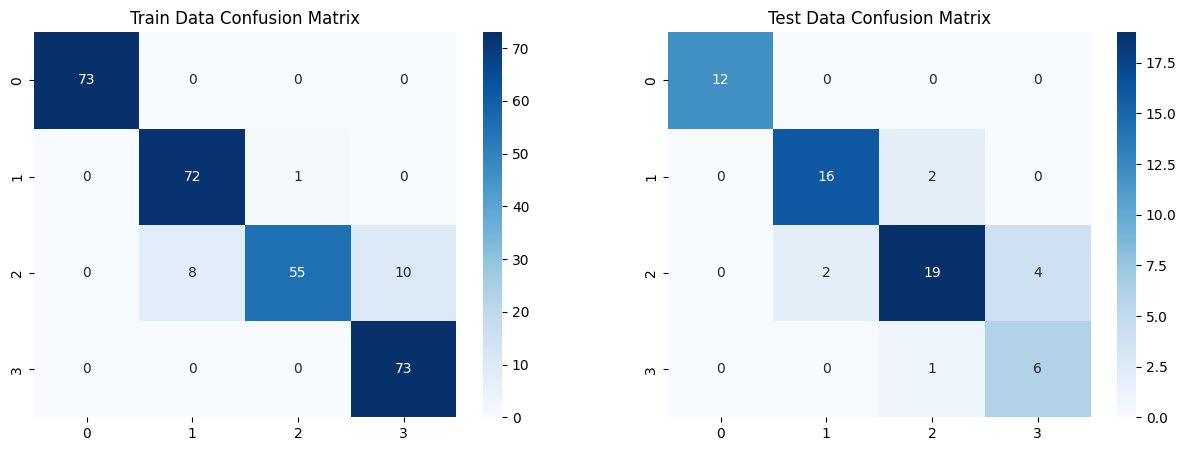

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        73

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.83      0.88        1

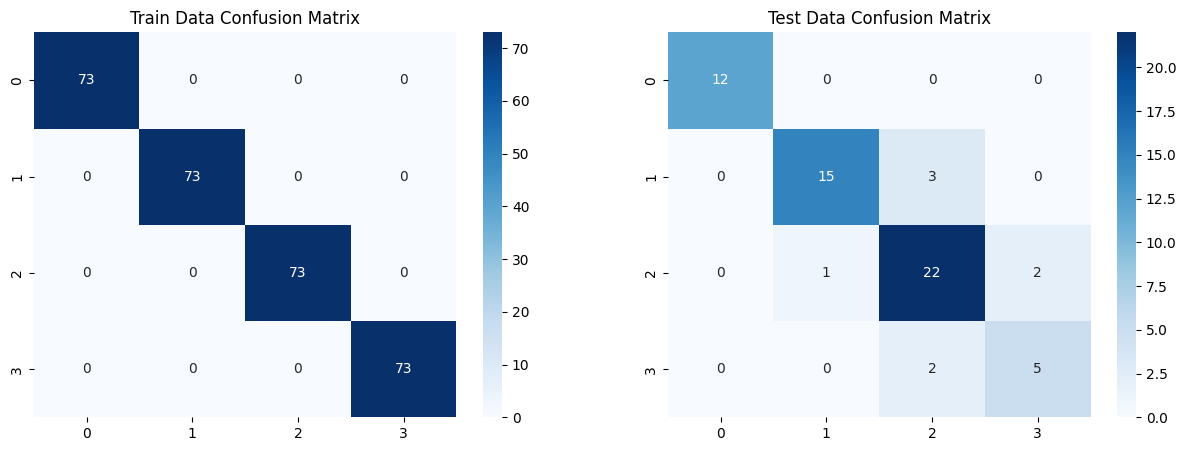

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        73

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.94      0.92        1

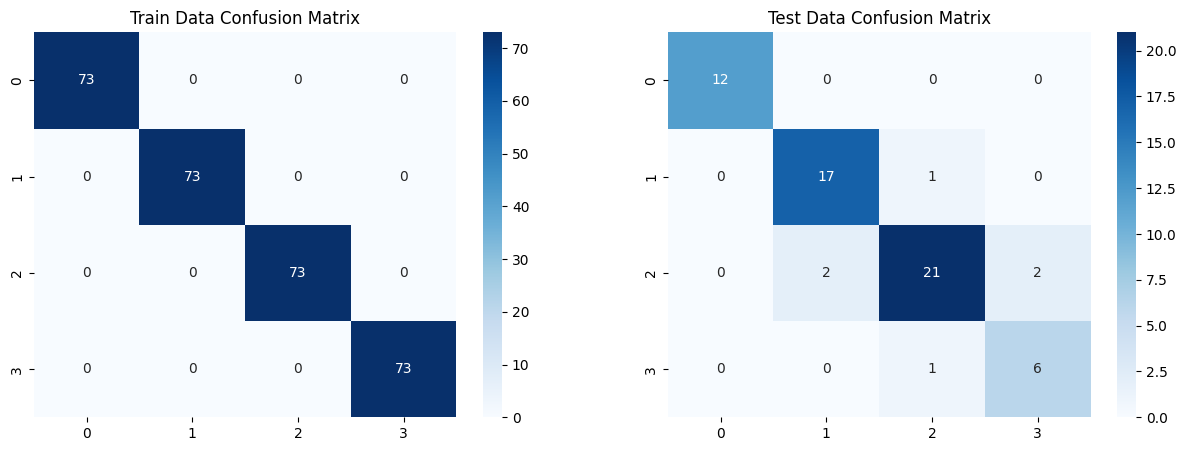

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.95      0.97      0.96        73
           2       0.80      0.88      0.84        73
           3       0.92      0.81      0.86        73

    accuracy                           0.91       292
   macro avg       0.92      0.91      0.91       292
weighted avg       0.92      0.91      0.91       292

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        18
          

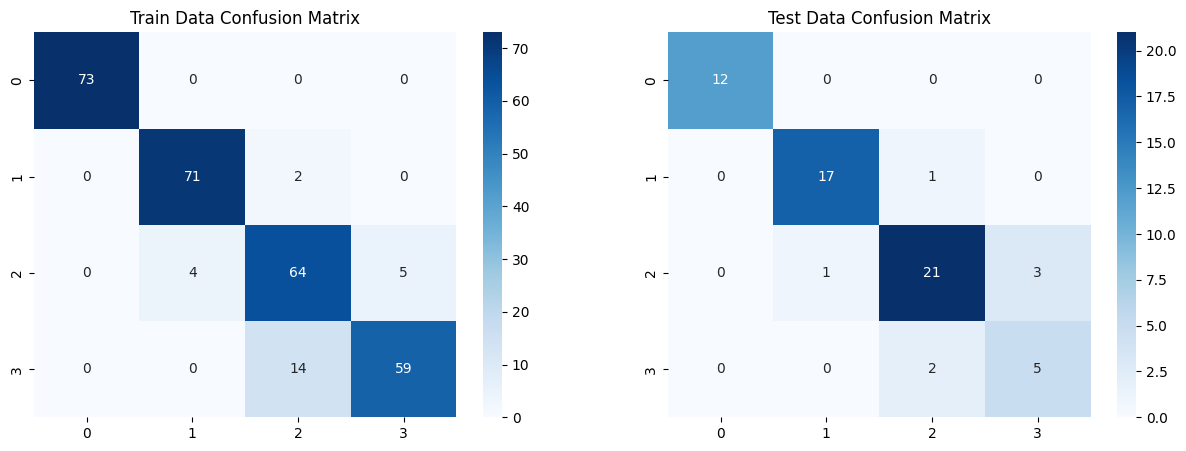

***************************************************************************


In [24]:
# Modle traing and validating
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')


## Create pipline 

In [25]:
# Importing libraries for pipline bilding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [26]:
x_trans = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors = 5)),
        ('scalar',RobustScaler())
    ]
)
x_trans
# Build Transformer

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [27]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', x_trans, x.columns)
    ]
)
preprocess
# Preprocessing steps

,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,n_neighbors,5
,weights,'uniform'


In [28]:
from imblearn.pipeline import Pipeline
# Library to use oversample methode in pipeline 

In [29]:
model = Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('over_sample',RandomOverSampler(random_state=42)),
        ('LogisticRegression',LogisticRegression(
            
            class_weight={
                0: 1.0,
                1: 1.0,
                2: 3.0,
                3: 3.0 
            }
            )
        )
    ]
)
model

# Define the Pipeline Model

,steps,"[('preprocess', ...), ('over_sample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
x = df.drop(['class'],axis=1)
y = df['class'].apply(lambda x: 0 if x == 'normal' else(
                                1 if x == 'mild' else (
                                    2 if x== 'moderate_pd'
                                    else 3
                                )))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)

# Split the data to train the model

In [31]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,153.477517,266.182741,126.527347,0.364738,0.003484,0.000127,0.001270,0.005794,0.002149,0.974411,0.001187,0.008555,0.008806,0.007418,0.136164,17.113034,0.021737,0.774502,-0.192747,0.073231,2.069356,0.009887
241,190.065733,157.097557,115.061888,0.051894,0.003171,0.002381,0.003550,0.004906,0.016842,0.302351,0.001695,0.008889,0.008618,0.015216,0.032126,20.415858,0.473170,0.701190,-0.584874,0.502881,3.998398,0.005398
242,111.180413,198.624370,143.087569,0.296861,0.004010,0.003300,0.002207,0.003058,0.019205,0.040428,0.000829,0.008829,0.004518,0.009997,0.049878,19.576961,0.315769,0.696636,-0.645240,0.210635,2.005980,0.075767
243,166.811504,218.072987,132.682152,0.142544,0.000175,0.003595,0.000002,0.000734,0.017330,0.234542,0.002322,0.009451,0.015156,0.016161,0.098297,17.760495,0.324740,0.882558,-0.956227,0.900989,3.484512,0.068598


In [32]:
df['class'].value_counts()

class
moderate_pd    98
mild           70
normal         50
severe_pd      27
Name: count, dtype: int64

In [33]:
# Train the model
model.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('over_sample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        52
           2       0.99      0.97      0.98        73
           3       0.90      0.95      0.93        20

    accuracy                           0.98       183
   macro avg       0.97      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94        18
           2       0.89      0.96      0.92        25
           3       0.86      0.86      0.86         7

    accuracy                           0.94        62
   macro a

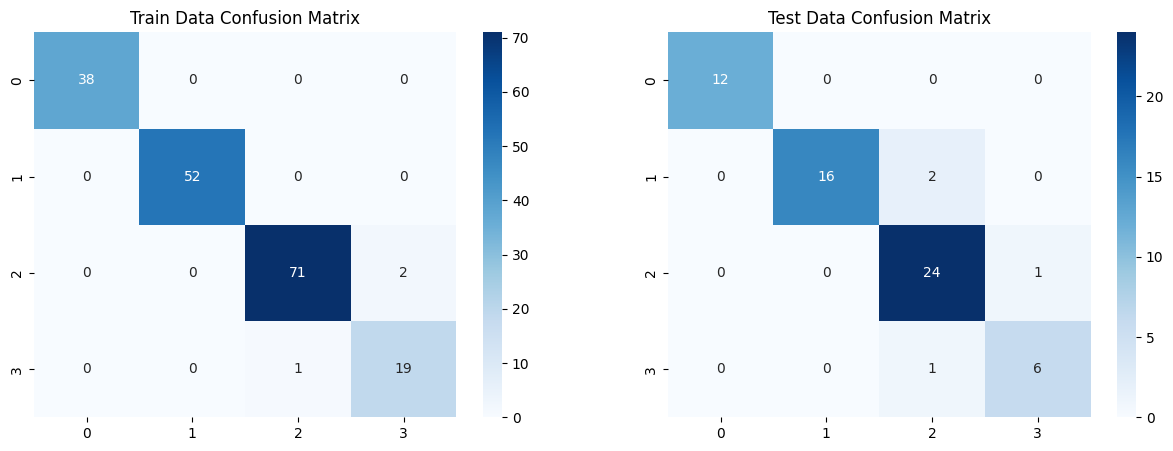

***************************************************************************


In [34]:
y_train_pread = model.predict(x_train)
y_test_pread = model.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

# Model Validation 

In [35]:
import pickle

pickle.dump(model,open('parkinsons_model.pkl','wb'))

pr
# Save the model for future use 

NameError: name 'pr' is not defined

In [ ]:
x1,y1 = ROS.fit_resample(x,y)

In [ ]:
len(model.predict(x1))

392

In [ ]:
print(classification_report(y1,model.predict(x1)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       1.00      0.97      0.98        98
           2       0.89      0.97      0.93        98
           3       0.97      0.93      0.95        98

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392

